# Генерируем данные

Создаем точки, которые примерно соответствуют эллипсу:

In [1]:
import numpy as np
t = np.linspace(0, 2 * np.pi, 50)
a = 10
b = 5
xc = 20
yc = 30
theta = np.pi/6
x = xc + a*np.cos(theta)*np.cos(t) - b*np.sin(theta)*np.sin(t)
y = yc + a*np.sin(theta)*np.cos(t) + b*np.cos(theta)*np.sin(t)
data = np.column_stack([x, y])
# воспроизводим результаты:
np.random.seed(seed=1234)
data += np.random.normal(size=data.shape)

Добавляем некорректные данные

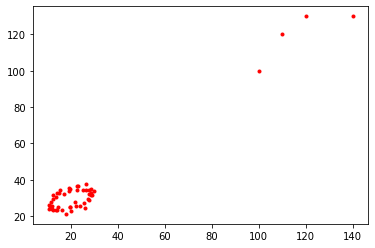

In [2]:
data[0] = (100, 100)
data[1] = (110, 120)
data[2] = (120, 130)
data[3] = (140, 130)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data[:,0],data[:,1],'r.')
plt.show()

# Оценка методом наименьших квадратов

In [7]:
import skimage.measure as sm
model = sm.EllipseModel()
model.estimate(data)

#параметры эллипса модели
# xc, yc, a, b, theta

np.set_printoptions(suppress=True)
model.params
#получаем плохие параметры

[73.53514375539402,
 78.26758206994066,
 9.294963688441136,
 80.77273222305244,
 2.303948938231313]

# Делаем оценку с помощью процедуры RANSAC

In [11]:
# Для подгонки эллипса требуется минимум 3 точки.
n_min = 3

# максимальное расстояние до точки совпадения
t_max = 3.0

ransac_model, inliers = sm.ransac(data, sm.EllipseModel, n_min, t_max, max_trials=50)
print (ransac_model.params)

original_params = np.array([xc,yc,a,b,theta])
print (original_params - ransac_model.params)


[19.852545172780793, 29.599391382202572, 9.419149174181227, 5.497673933574777, 0.5282891458540245]
[ 0.14745483  0.40060862  0.58085083 -0.49767393 -0.00469037]


Найденные данные являются логически "истинными"

In [12]:
inliers

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

первые значения - это плохие вырезки.

# Рисуем эллипс

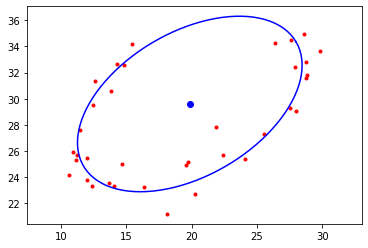

In [13]:
t = np.linspace(0, 2 * np.pi, 100)
p = ransac_model.params
xe = p[0] + p[2]*np.cos(p[4])*np.cos(t) - p[3]*np.sin(p[4])*np.sin(t)
ye = p[1] + p[2]*np.sin(p[4])*np.cos(t) + p[3]*np.cos(p[4])*np.sin(t)
plt.clf()
plt.plot(data[inliers,0],data[inliers,1],'r.')
plt.plot(xe,ye,'b-')
plt.plot(p[0],p[1],'bo')
plt.axis('equal')
plt.show()